# Eddy tracking in the Southern Ocean
###### By: Josué Martínez Moreno

This example use the output of Dr Adele Morrison ([Click here to know more about her work!](http://rses.anu.edu.au/people/adele-morrison)). This is a high resolution simulation of the Southern Ocean ($1/10^o$ or $0.1^o$). For the porpoise of this script, we will use 3 months of simulation.

In [1]:
# Import all the Modules for the analysis.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import glob, os
from trackeddy.datastruct import *
from trackeddy.trackeddy import *
from trackeddy.geometryfunc import *
from trackeddy.init import *

from trackeddy.physics import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'

In [3]:
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

## Analize data in just one time step. 

The algoritm consider all the closed contours as eddies, those ones where the ellipse ajusted fit are traking.

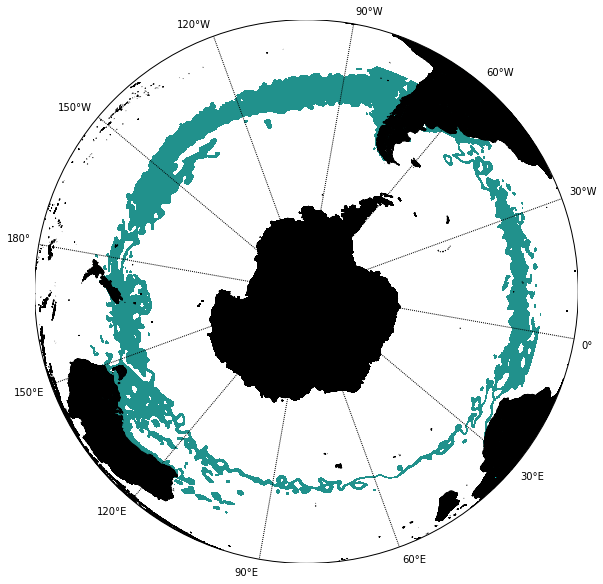

The total of contours was 83


In [4]:
levels=[-10,10]
areamap=array([[0,len(lon)],[0,len(lat)]])
eddytd=scan_eddym(eta[0,:,:],lon,lat,levels,0,areamap,destdir='',okparm='',diagnostics=False)

## Calculate the Sea Surface Height Anomaly (ssha)

To calculate the ssha we will use the average over 10 years ($\overline{ssh_t}$), probable we will keep the season variations, but at least almost all the other variatios will be removed. 
\begin{equation}
ssha=ssh-\overline{ssh_t}
\end{equation}

In [ ]:
count=0
timeavessh=zeros([345-306,shape(eta)[1],shape(eta)[2]])
for tt in range(306,345):
    ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]*100
    etamean=mean(eta,axis=0)
    timeavessh[count,:,:]=etamean[:,:]
    count=count+1

In [ ]:
pcolormesh(eta[0,:,:]-mean(timeavessh,axis=0))

In [5]:
areamap=array([[0,len(lon)],[0,len(lat)]])
for ii in range(0,shape(eta)[0]):
    print ii
    ssha=eta[ii,:,:]-mean(timeavessh,axis=0)
    eddys=scan_eddym(ssha,lon,lat,levels,ii,areamap,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

0


NameError: name 'a' is not defined

In [13]:
ncfileu=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_u.nc')
ncfilev=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_v.nc')
print ncfileu
lonu=ncfileu.variables['xu_ocean_sub01'][:]
latu=ncfileu.variables['yu_ocean_sub01'][:]
u=ncfileu.variables['u'][:,0,:,:]
v=ncfilev.variables['v'][:,0,:,:]

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_u.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xu_ocean_sub01(3600), yu_ocean_sub01(930), st_ocean(75), st_edges_ocean(76), time(90), nv(2)
    variables(dimensions): float64 xu_ocean_sub01(xu_ocean_sub01), float64 yu_ocean_sub01(yu_ocean_sub01), float64 st_ocean(st_ocean), float64 st_edges_ocean(st_edges_ocean), float64 time(time), float64 nv(nv), float32 u(time,st_ocean,yu_ocean_sub01,xu_ocean_sub01), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time), float64 time_bounds(time,nv)
    groups: 



0


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1
2
4
6
7
9
10
11
12
14
15
16
17
18
19


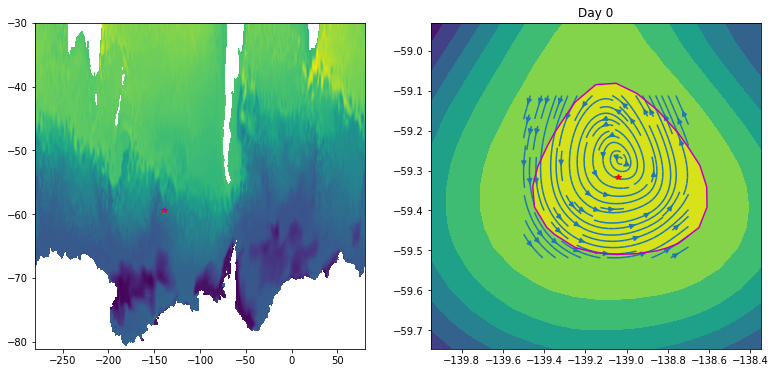

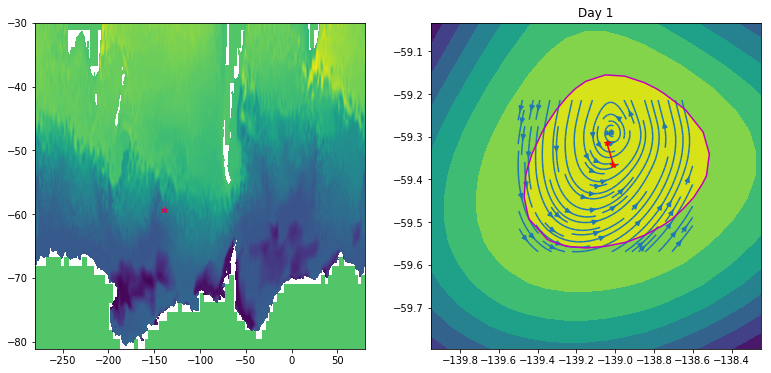

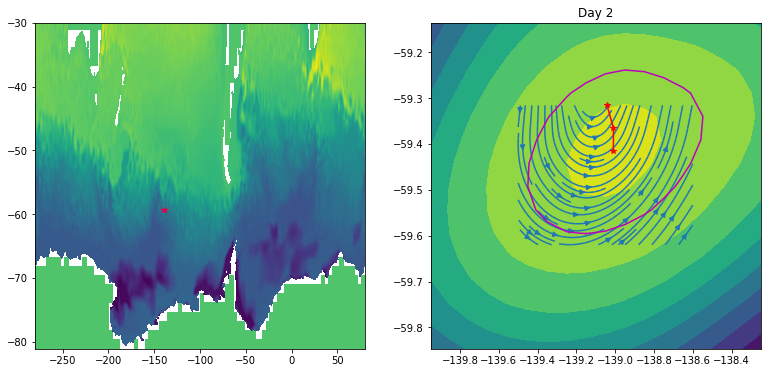

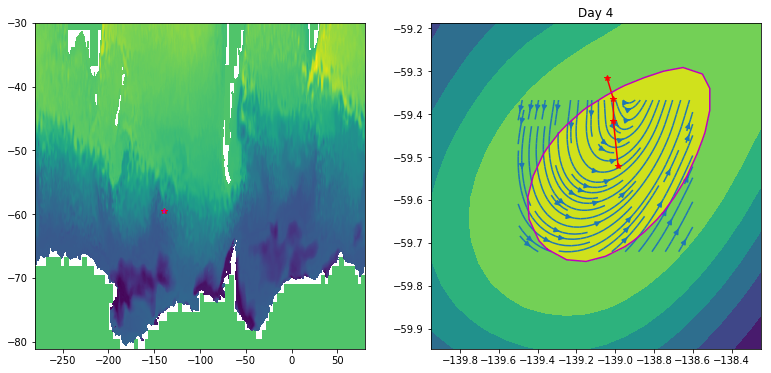

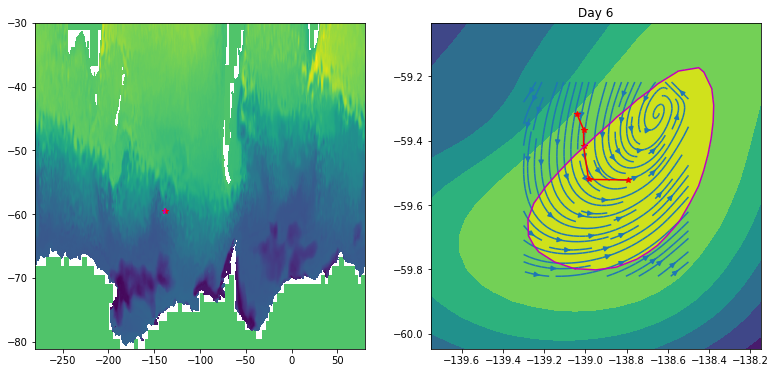

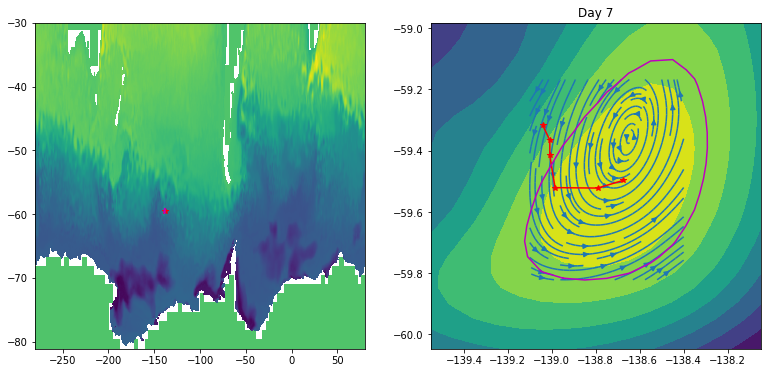

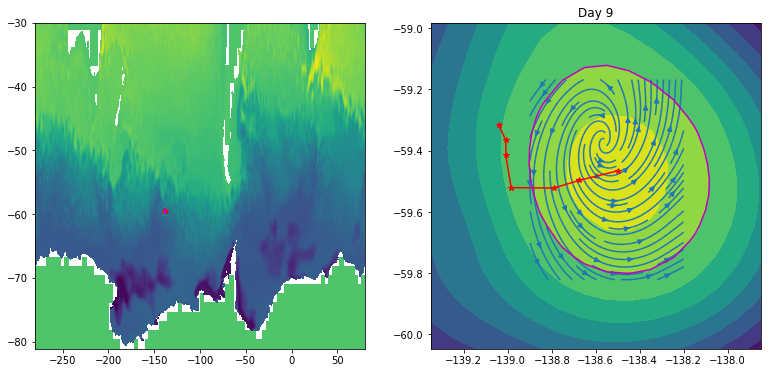

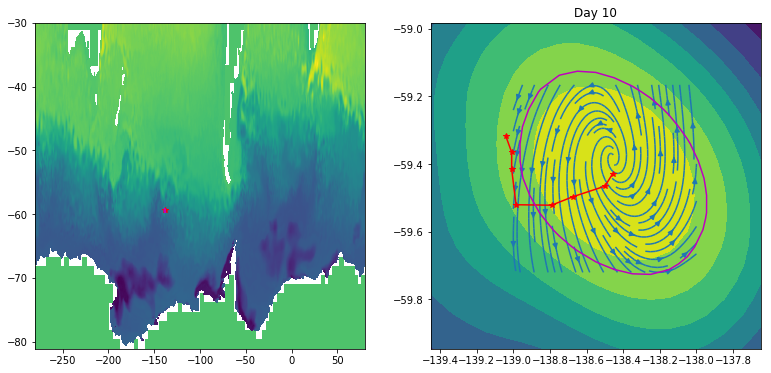

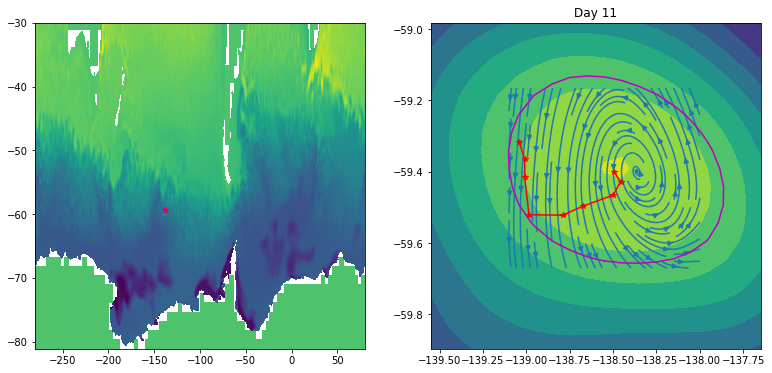

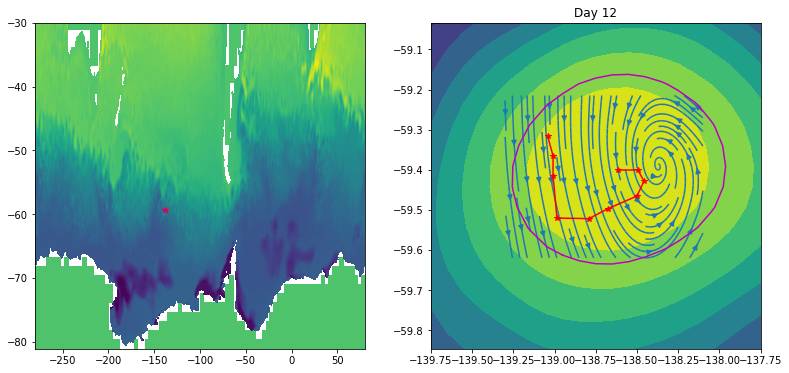

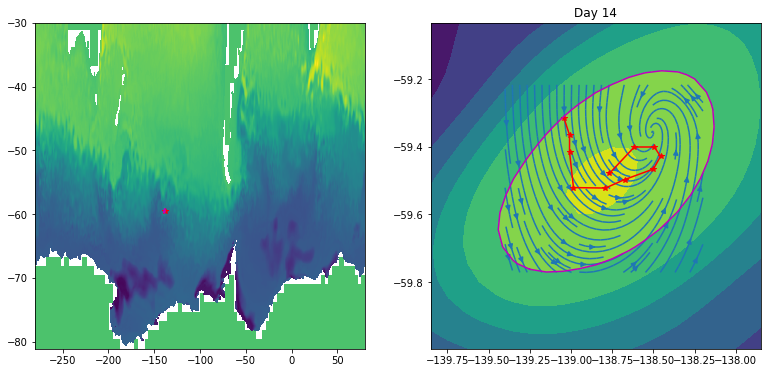

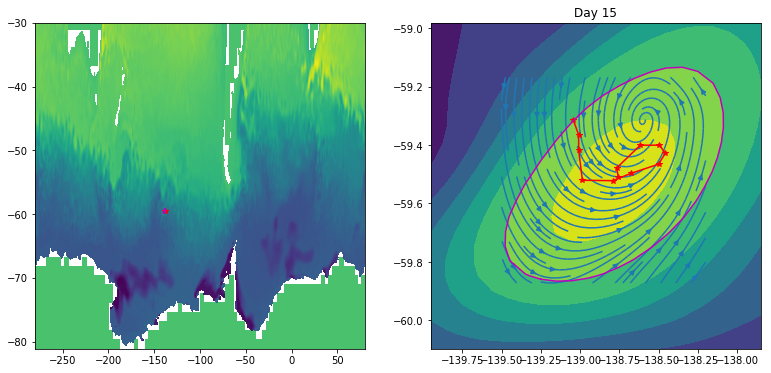

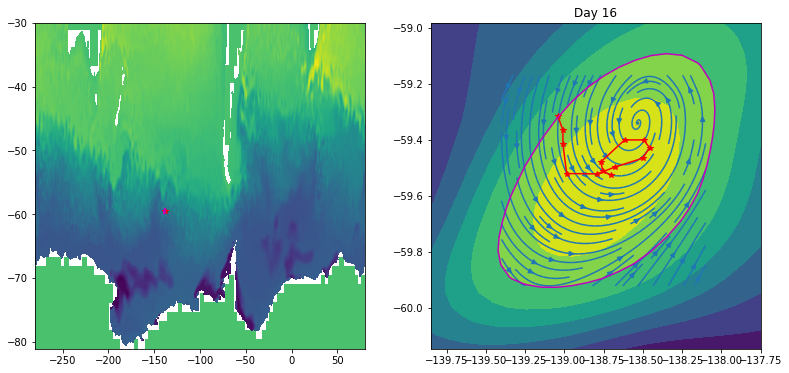

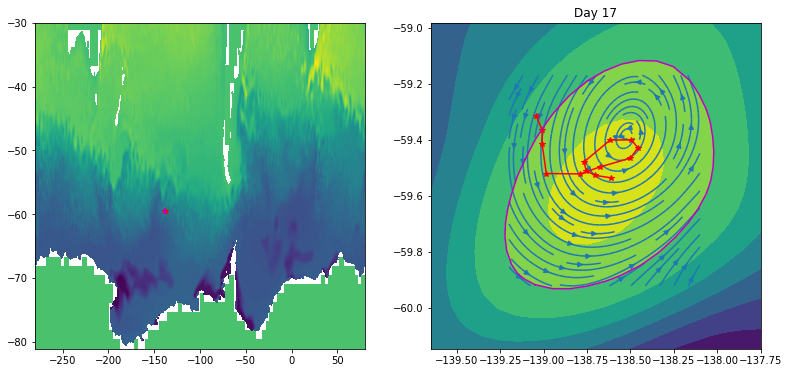

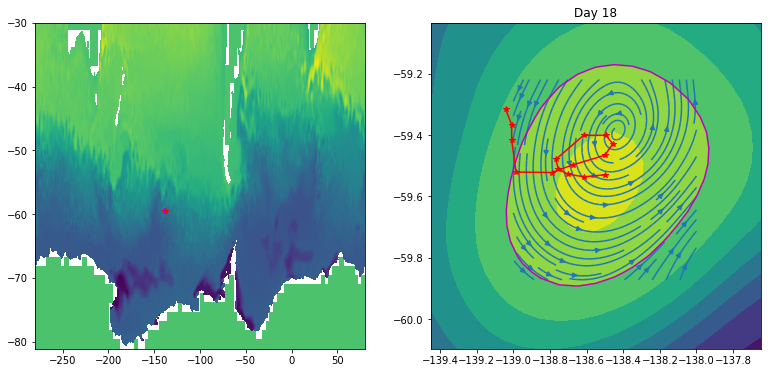

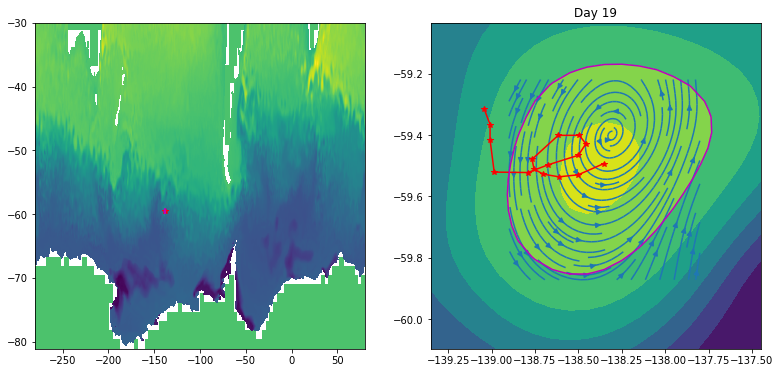

In [14]:
#4,2,3
eddy='eddyn_1'
#print eddytd[eddy]['position']
for ii in range(0,len(eddytd[eddy]['time'])):
    rdd=eddytd[eddy]['time'][ii][0]
    print rdd
    dd="%03d" % ii
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 6))
    ax1.pcolormesh(lon,lat,eta[rdd,:,:])
    ax1.plot(eddytd[eddy]['position'][ii,0],eddytd[eddy]['position'][ii,1],'*r')
    ax1.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    c1,c2=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,1].min())
    c3,c4=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].max(),eddytd[eddy]['contour'][ii,1].max())
    ax2.contourf(lon[c1-4:c3+4],lat[c2-4:c4+4],eta[rdd,c2-4:c4+4,c1-4:c3+4])
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'-r')
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'*r')
    ax2.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    #print eddytd['eddyn_14']['contour'][:,1]
    #print u[ii,c2:c4,c1:c3]
    #print lonu[c1],lonu[c3],latu[c2],latu[c4]
    ax2.streamplot(lonu[c1:c3],latu[c2:c4],u[ii,c2:c4,c1:c3],v[rdd,c2:c4,c1:c3])
    #ax2.set_ylim([eddytd[eddy]['contour'][ii,1].min(),eddytd[eddy]['contour'][ii,1].max()])
    #ax2.set_xlim([eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,0].max()])
    ax2.set_title('Day '+str(rdd))
    f.savefig('../output/'+eddy+str(dd)+'.png', bbox_inches='tight')
#eddytd['eddyn_14']
#figure()
#streamplot(lonu,latu,u[ii,:,:],v[ii,:,:], density=1)


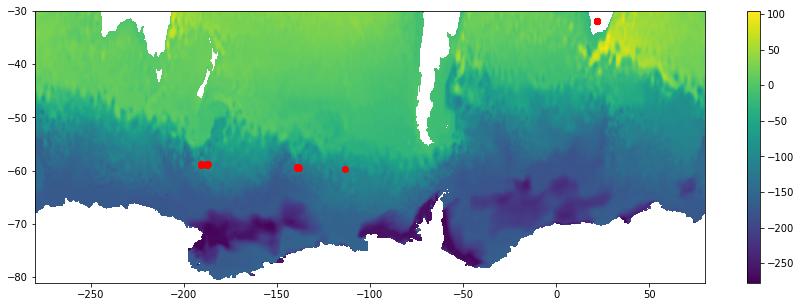

In [15]:
#print shape(eddys['Position'])
#print shape(eddys['Ellipse'])
#eddypos=eddys['Position']
#print eddypos[0]

#for ii in range(0,shape(eddys['Position'])[0]):
#    
    
figure(figsize=(15,5))
pcolormesh(lon,lat,eta[0,:,:])
for value in eddytd:
    poss=eddytd[value]['position']
    if len(poss)==2:
        plot(poss[0],poss[1],'or')
    else:
        plot(poss[:,0],poss[:,1],'or')
colorbar()

# Functions to extract data of each eddy in the Ocean

/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:23: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


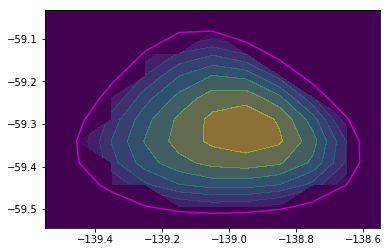

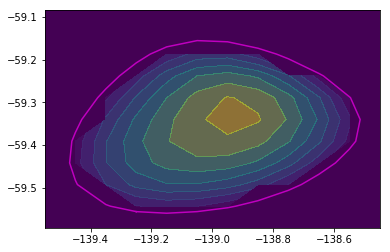

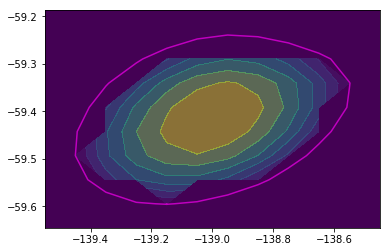

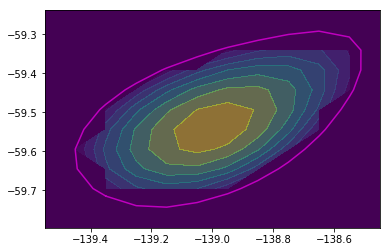

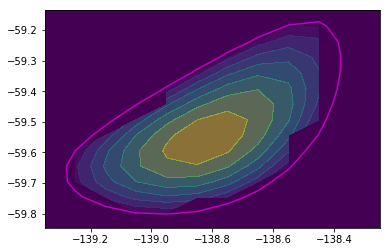

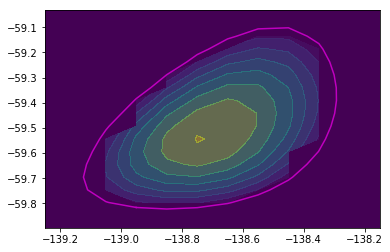

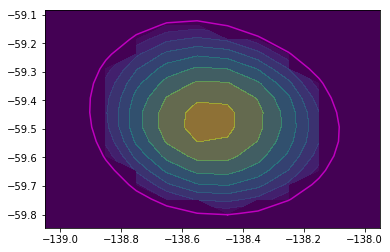

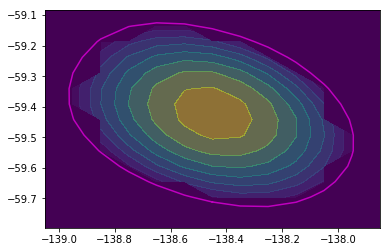

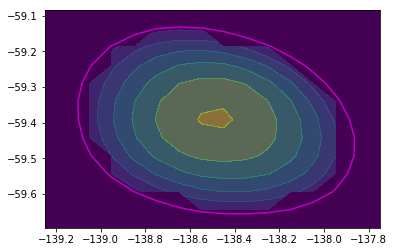

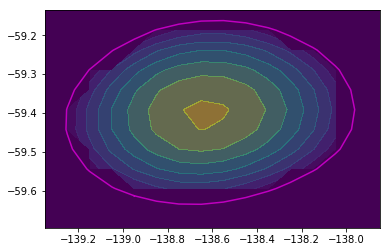

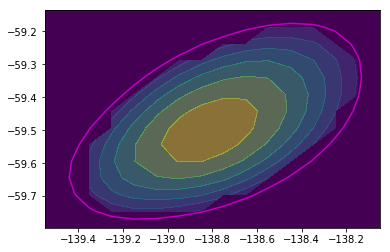

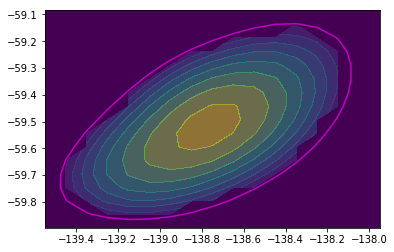

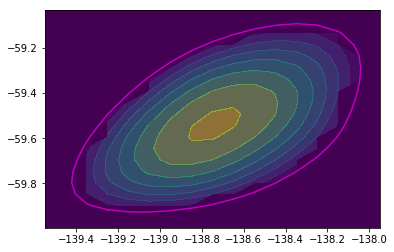

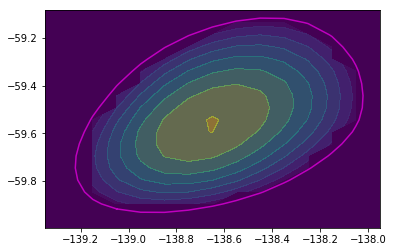

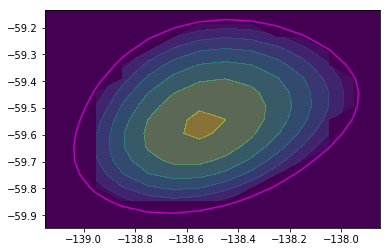

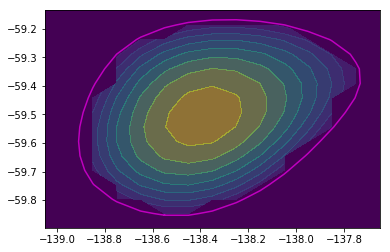

In [16]:
#print eddytd['eddyn_1']['contour']
#mask function V1

##SAVE LEVEL IN THE EDDYN DATABASE

def exeddy(eddydt,lat,lon,data):
    print 'Work in progress'
    
level=-80
threshold=1
for ct in range(0,len(eddytd['eddyn_1']['time'])):
    rct=eddytd['eddyn_1']['time'][ct][0]
    data=eta[rct,:,:]*1
    juesteddy=zeros(shape(data))
    lonmi=eddytd['eddyn_1']['contour'][ct][0].min()
    lonma=eddytd['eddyn_1']['contour'][ct][0].max()
    latmi=eddytd['eddyn_1']['contour'][ct][1].min()
    latma=eddytd['eddyn_1']['contour'][ct][1].max()
    #print latma, lonma
    mimcx,mimcy=find2d(lon,lat,lonmi,latmi)
    mamcx,mamcy=find2d(lon,lat,lonma,latma)
    
    loncm=lon[mimcx-threshold:mamcx+1+threshold]
    latcm=lat[mimcy-threshold:mamcy+1+threshold]
    datacm=data[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]
    datacm[datacm<=level]=nan
    pcolormesh(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm)
    contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm,alpha=0.5)
    plot(eddytd['eddyn_1']['contour'][ct][0],eddytd['eddyn_1']['contour'][ct][1],'-m')
    plt.show()        
    juesteddy[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]=datacm

In [17]:
print shape(juesteddy)

(931, 3600)


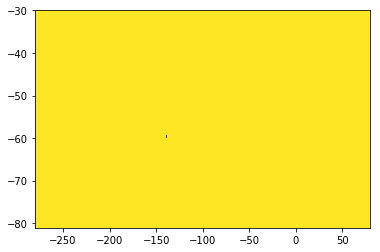

In [18]:
eddysplot = ma.masked_where(np.isnan(juesteddy),juesteddy)
pcolormesh(lon,lat,eddysplot)

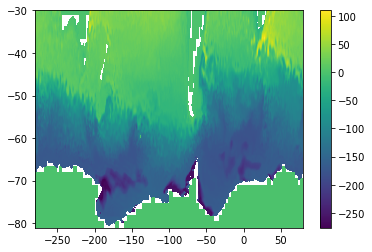

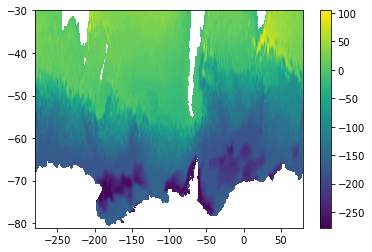

In [19]:
figure()
pcolormesh(lon,lat,data-eddysplot)
colorbar()
figure()
pcolormesh(lon,lat,eta[0,:,:])
colorbar()

# SSH time average 

Calculate the ssh mean of all the Adele experiments.

In [20]:
timeavessh=zeros([345-306,shape(eta)[1],shape(eta)[2]])
print shape(timeavessh)

(39, 931, 3600)


In [21]:
count=0
for tt in range(306,345):
    ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]*100
    etamean=mean(eta,axis=0)
    timeavessh[count,:,:]=etamean[:,:]
    count=count+1

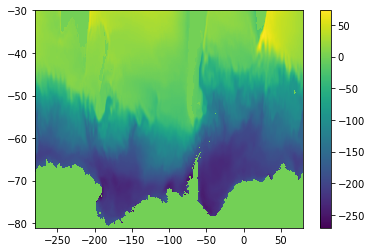

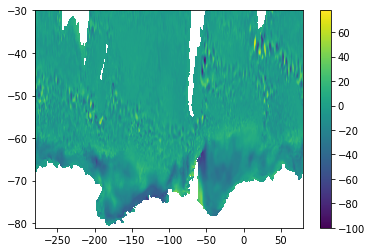

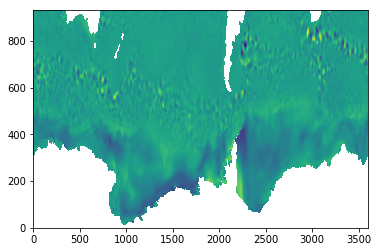

In [27]:
realmean=mean(timeavessh,axis=0)
figure()
pcolormesh(lon,lat,realmean)
colorbar()
figure()
pcolormesh(lon,lat,eta[0,:,:]-realmean)
colorbar()
figure()
pcolormesh(eta[0,:,:]-realmean)

0
('The total of contours was', 35)
('ts', 0)
1
('The total of contours was', 58)
('ts', 1)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 2 max -146.55 t0 -148.532741012 t1 -148.535327843 min -150.667341062 area0 1.80208740896 area1 1.80436124816
2 -76.5045420509 -76.9242226491 -76.9238958962 -77.3070897841
****Tracking Eddy2****
eddyn_1
number 3 max -139.900494648 t0 (-143.688952216-0j) t1 (-143.553558134-0j) min -146.923728757 area0 4.58381201071 area1 3.92982129869
3 -74.6256776813 (-75.2635969051-0j) (-75.2266917073-0j) -75.8287123808
****Tracking Eddy3****
eddyn_8
*****New Eddy*****
eddyn_9
number 7 max -66.55 t0 -66.7180529362 t1 -66.7207412403 min -66.9472869364 area0 0.0772720372188 area1 0.0806273006747
7 -66.9173545871 -67.0787663511 -67.0721986949 -67.2118840872
****Tracking Eddy7****
eddyn_10
number 8 max -66.9524503113 t0 -67.5266339216 t1 (-67

('The total of contours was', 38)
('ts', 14)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.489233569-0j) t1 -148.484530724 min -150.220478868 area0 [ 1.7489365] area1 1.7440702474
1 -76.5045420509 (-76.9277169616-0j) -76.9281694951 -77.3070897841
****Tracking Eddy1****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
15
('The total of contours was', 47)
('ts', 15)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 3 max -146.55 t0 (-148.484530724+0j) t1 (-148.483227789-0j) min -150.217975516 area0 [ 1.74407025] area1 1.7427097481
3 -76.5045420509 (-76.9281694951+0j) (-76.928297544-0j) -77.3070897841
****Tracking Eddy3****
ed

('The total of contours was', 35)
('ts', 29)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.53451915+0j) t1 -148.535097702 min -150.383431076 area0 [ 1.79799174] area1 1.79843130393
1 -76.5045420509 (-76.9230015068+0j) -76.9229519872 -77.3070897841
****Tracking Eddy1****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
30
('The total of contours was', 38)
('ts', 30)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.535097702+0j) t1 -148.518163854 min -150.326297541 area0 [ 1.7984313] area1 1.77880991506
1 -76.5045420509 (-76.9229519872+0j) -76.9248150691 -77.3070897841
****Tracking Eddy1****
eddyn_1
**

('The total of contours was', 35)
('ts', 44)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.593650007+0j) t1 -148.571224847 min -150.454757462 area0 [ 1.85370783] area1 1.83094577526
1 -76.5045420509 (-76.91647488+0j) -76.9187137676 -77.3070897841
****Tracking Eddy1****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
45
('The total of contours was', 42)
('ts', 45)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.571224847+0j) t1 -148.52734723 min -150.361104646 area0 [ 1.83094578] area1 1.7917567715
1 -76.5045420509 (-76.9187137676+0j) -76.9237254109 -77.3070897841
****Tra

('The total of contours was', 48)
('ts', 56)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.508738307-0j) t1 -148.478899563 min -150.213891039 area0 [ 1.76997276] area1 1.73817405314
1 -76.5045420509 (-76.9256887292-0j) -76.9287143368 -77.3070897841
****Tracking Eddy1****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
57
('The total of contours was', 52)
('ts', 57)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.478899563+0j) t1 -148.456130733 min -150.185029309 area0 [ 1.73817405] area1 

('The total of contours was', 45)
('ts', 69)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 2 max -146.55 t0 (-148.456475735+0j) t1 -148.452538687 min -150.179174344 area0 [ 1.72147806] area1 1.71652452718
2 -76.5045420509 (-76.9307141479+0j) -76.9310806297 -77.3070897841
****Tracking Eddy2****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
70
('The total of contours was', 48)
('ts', 70)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 3 max -146.55 t0 (-148.452538687+0j) t1 -148.470704206 min -150.195434148 area0 [ 1.71652453] area1 

('The total of contours was', 62)
('ts', 82)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 2 max -146.55 t0 (-148.458505758+0j) t1 -148.450618114 min -150.156737391 area0 [ 1.71216537] area1 1.70046104863
2 -76.5045420509 (-76.9307738849+0j) -76.9315118983 -77.3070897841
****Tracking Eddy2****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_17
*****New Eddy*****
83
('The total of contours was', 63)
('ts', 83)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
number 1 max -146.55 t0 (-148.450618114+0j) t1 -148.456669938 min -150.16875763

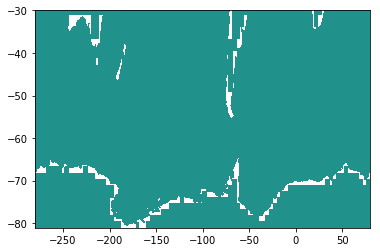

In [23]:
etaa=eta-realmean
levels=[-40,40]
for ii in range(0,shape(eta)[0]):
    print ii
    eddys=scan_eddym(etaa,lon,lat,levels,ii,a,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

In [24]:
eddytd['eddyn_2']['time']

array([[ 0],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [86]])

0
47
48
49
50
51
52
86


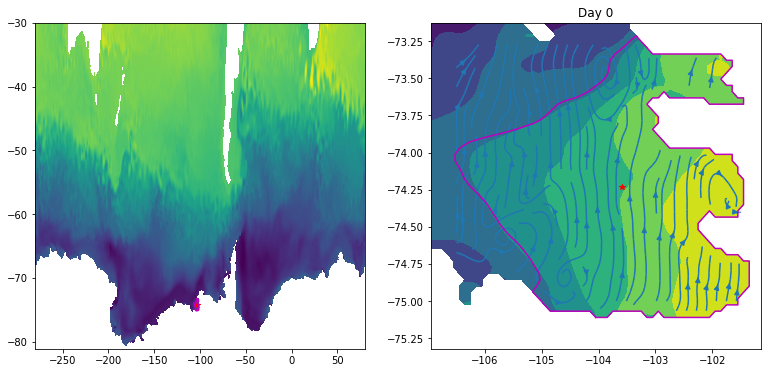

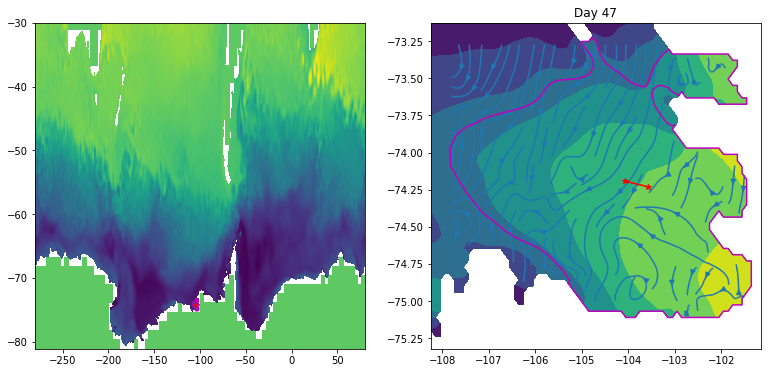

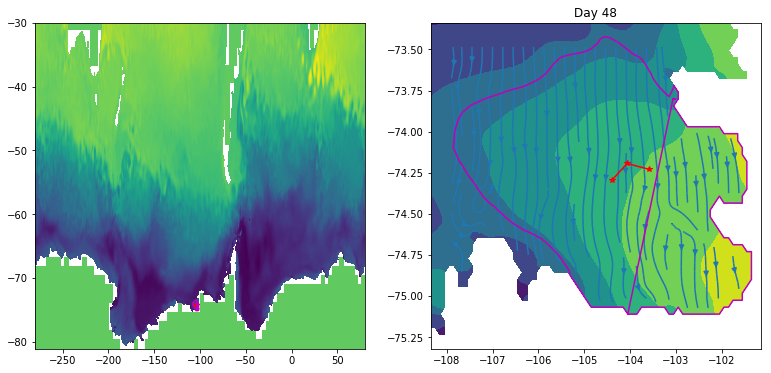

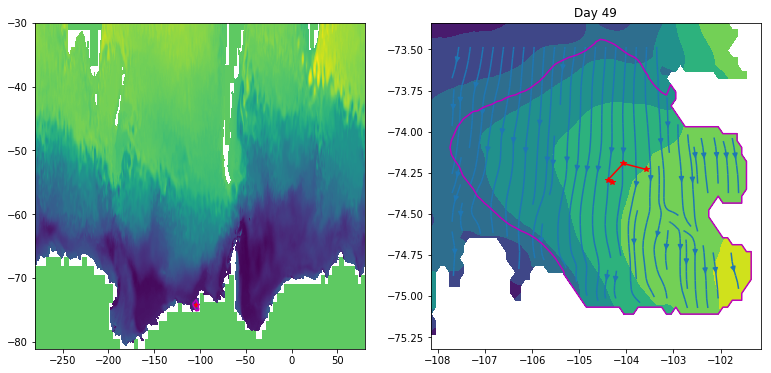

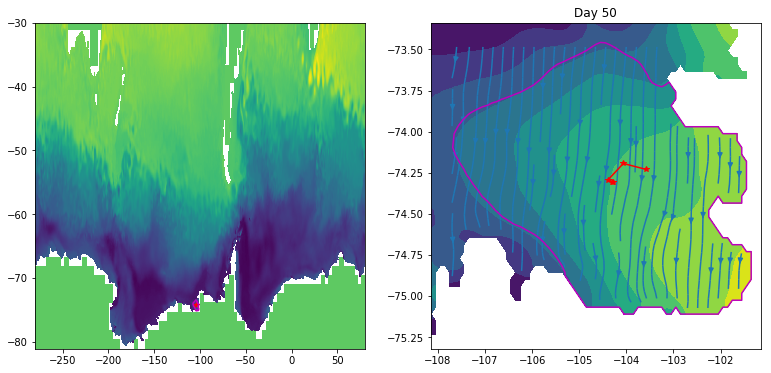

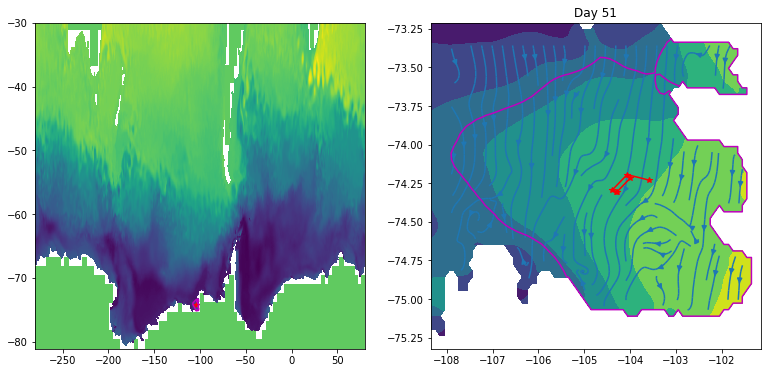

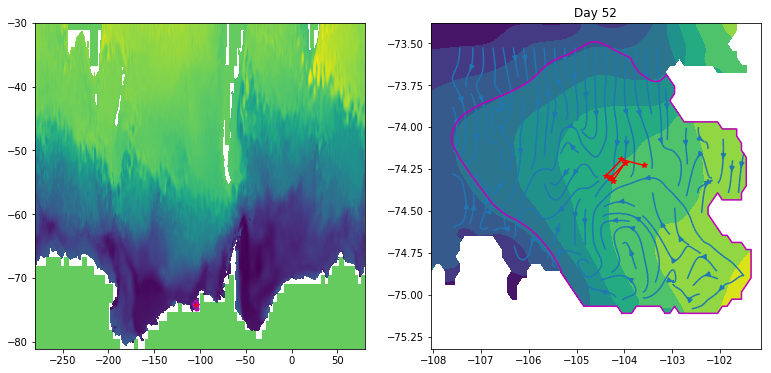

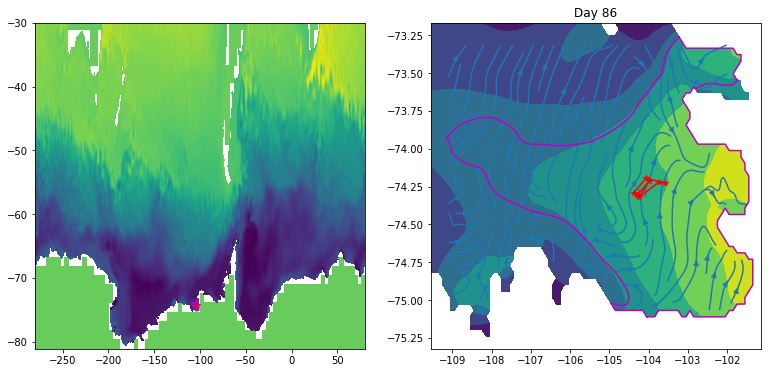

In [26]:
eddy='eddyn_2'
#print eddytd[eddy]['position']
for ii in range(0,len(eddytd[eddy]['time'])):
    rdd=eddytd[eddy]['time'][ii][0]
    print rdd
    dd="%03d" % ii
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 6))
    map1=ax1.pcolormesh(lon,lat,eta[rdd,:,:])
    ax1.plot(eddytd[eddy]['position'][ii,0],eddytd[eddy]['position'][ii,1],'*r')
    ax1.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    c1,c2=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,1].min())
    c3,c4=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].max(),eddytd[eddy]['contour'][ii,1].max())
    ax2.contourf(lon[c1-4:c3+4],lat[c2-4:c4+4],eta[rdd,c2-4:c4+4,c1-4:c3+4])
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'-r')
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'*r')
    ax2.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    ax2.streamplot(lonu[c1:c3],latu[c2:c4],u[ii,c2:c4,c1:c3],v[rdd,c2:c4,c1:c3])
    ax2.set_title('Day '+str(rdd))
    f.savefig('../output/'+eddy+str(dd)+'.png', bbox_inches='tight')
    #f.close()

# Okubo-Weiss Parameter ($W$)

Calculate the W parameter for the geostrophically velocity components:<br>
\begin{equation}
v=(g/f)h_x
\end{equation}
\begin{equation}
u=-(g/f)h_y
\end{equation}
where $h$ is the SSH, $g$ is the gravitational acceleration and $f$ is the Coriolis parameter.